##### Contenido bajo licencia CC-BY 4.0, código bajo licencia MIT. (c) 2015 C Cooper. Basado en [numerical-MOOC](https://github.com/numerical-mooc/numerical-mooc), CC-BY 4.0 2014 L Barba

# Laboratorio 5: métodos implícitos

¡Ya estamos en el quinto laboratorio! El curso partió revisando conceptos básicos de discretización de derivadas, para pasar a ecuaciones diferenciales ordinarias y después a ecuaciones diferenciales parciales. Eso si, en todos los laboratorios hemos usado la misma forma de discretizar el tiempo, usando diferencias atrasadas, y eso cambiará hoy. Algo de esto vimos en el laboratorio 3 (sobre ecuaciones diferenciales ordinarias), pero hoy profundizaremos aún más.

## Teoría

### Método explícito
Usemos la ecuación de difusión en una dimensión para guiar la discusión:

\begin{equation}
\frac{\partial T}{\partial t} = \alpha \frac{\partial^2 T}{\partial x^2}.
\end{equation}

¿Por qué usamos $T$ y $\alpha$? La ecuación de difusión modela la conducción de calor, donde $T$ es la temperatura y $\alpha=\kappa/\rho c_p$ el coeficiente de [difusividad térmica](https://es.wikipedia.org/wiki/Difusividad_t%C3%A9rmica).

En el laboratorio 4 discretizamos la ecuación de difusión con diferencias atrasadas en tiempo y centradas en el espacio, lo que nos dió:

\begin{equation}
\frac{T_{i}^{n+1} - T_i^n}{\Delta t} - \alpha \frac{T_{i+1}^{n} - 2T_i^n + T_{i-1}^{n}}{(\Delta x)²} = 0.
\end{equation}

La gracia de usar diferencia atrasada es que para obtener el valor de $T^{n+1}_i$ usamos solamente variables del paso de tiempo anterior, que es conocido. Pongamos lo que no conocemos al lado izquierdo y lo conocido al lado derecho:

\begin{equation}
T_{i}^{n+1} = T_i^n + \frac{\alpha \Delta t}{(\Delta x)²} \left(T_{i+1}^{n} - 2T_i^n + T_{i-1}^{n}\right),
\end{equation}

así, llegamos a una ecuación explícita, fácil de resolver. La diferencia atrasada en el tiempo es equivalente a decir que estamos usando el método de Euler explícito que vimos en el laboratorio 3.

Una representación gráfica de esto es:

<img src="stencil_explicito.png"width="300px">

Vimos en el laboratorio 4 que esta discretización tiene una restricción de estabilidad muy estricta, que era:

\begin{equation}
\frac{\alpha \Delta t}{(\Delta x)²} < \frac{1}{2}
\end{equation}

y nos obligaba a usar pasos de tiempo ridículamente pequeños.  

### Método implícito
El laboratorio 3 esbozó una solución a esto. Vimos que la integración con Euler usando los valores del tiempo $n+1$ en la función $f(t_{n+1},y(t_{n+1}))$ era incondicionalmente estable. Esto es equivalente a usar diferencias adelantadas en el tiempo, lo que nos deja:

\begin{equation}
\frac{T_{i}^{n+1} - T_i^n}{\Delta t} - \alpha \frac{T_{i+1}^{n+1} - 2T_i^{n+1} + T_{i-1}^{n+1}}{(\Delta x)²} = 0.
\end{equation}

Hasta ahora, todo bien. No es más que usar Euler implícito en el tiempo.

Pongamos lo que no conocemos a la izquierda y lo que conocemos a la derecha:

\begin{equation}
-T_{i+1}^{n+1} + \left( 2+ \frac{(\Delta x)²}{\alpha \Delta t} \right) T_{i}^{n+1} - T_{i-1}^{n+1} = \frac{(\Delta x)²}{\alpha \Delta t}T_i^n
\end{equation}

y aquí se hace evidente que tenemos un problema: una ecuación, tres incógnitas. Gráficamente, esto se puede visualizar así:

<img src="stencil_implicito.png"width="300px">

Digamos que tenemos una malla con $N$ puntos en el espacio que va desde $i=0$ hasta $i=N-1$, con una condición de borde de Dirichlet a la izquierda ($T_0^{n}$ conocido para todo $n$) y una de Neumann a la derecha ($\partial T_{N-1}^{n}/\partial x$ conocido para todo $n$). $T_0^{n+1}$ es conocido, pero ¿cómo se ve la ecuación para $T_1^{n+1}$?

\begin{equation}-T_{0}^{n+1} + \left( 2 + \frac{\Delta x^2}{\alpha\Delta t}\right) T_{1}^{n+1}  - T_{2}^{n+1} = T_{1}^{n}\frac{\Delta x^2}{\alpha\Delta t} \end{equation}

¿y para $T_2^{n+1}$?

\begin{equation}-T_{1}^{n+1} + \left( 2 + \frac{\Delta x^2}{\alpha\Delta t}\right) T_{2}^{n+1} - T_{3}^{n+1} = T_{2}^{n}\frac{\Delta x^2}{\alpha\Delta t} \end{equation}

¿y $T_3^{n+1}$?

\begin{equation}-T_{2}^{n+1} + \left( 2 + \frac{\Delta x^2}{\alpha\Delta t}\right) T_{3}^{n+1} - T_{4}^{n+1} = T_{3}^{n}\frac{\Delta x^2}{\alpha\Delta t} \end{equation}

ven el patrón, ¿cierto? Se repite $T_2^{n+1}$ en los tres casos: si aplicamos la ecuación para cada punto de la malla, tendremos el mismo número de ecuaciones e incógnitas.

### Condiciones de borde
Como en los puntos en $i=0$ e $i=N-1$ se enfuerzan las condiciones de borde, no es necesario aplicar la ecuación en ellos. ¿Qué hacemos entonces?

#### Condición de borde de Dirichlet
El caso $i=0$ es una condición de borde de Dirichlet, por lo tanto, el término $T_{0}^{n+1}$ en la ecuación para $T_1^{n+1}$ es conocido y puede pasar al lado derecho de la ecuación:

\begin{equation} - \left( 2 + \frac{\Delta x^2}{\alpha\Delta t}\right) T_{1}^{n+1} +  T_{2}^{n+1} = -T_{1}^{n}\frac{\Delta x^2}{\alpha\Delta t} - T_{0}^{n+1} \end{equation}

#### Condición de borde de Neumann
En $i=N-1$ hay una condición de borde de Neumann y es algo más difícil. Este punto aparece en la ecuación para $i=N-2$, que es:

\begin{equation} -T_{N-3}^{n+1} + \left( 2 + \frac{\Delta x^2}{\alpha\Delta t}\right) T_{N-2}^{n+1} - T_{N-1}^{n+1} = T_{N-2}^{n}\frac{\Delta x^2}{\alpha\Delta t} \end{equation}

Digamos que la condición de borde es que hay una entrada de calor en $x=L$:

\begin{equation}
\left. \frac{\partial T}{\partial x} \right|_{x=L} = q
\end{equation}

La forma más fácil de tratar con la condición de borde de Neumann es discretizar con diferencias finitas: 

\begin{equation}\frac{T^{n+1}_{N-1} - T^{n+1}_{N-2}}{\Delta x} = q.\end{equation}

y reemplazar en la ecuación anterior:

\begin{equation} - T_{N-3}^{n+1} + \left( 1 + \frac{\Delta x^2}{\alpha\Delta t}\right) T_{N-2}^{n+1} = T_{N-2}^{n}\frac{\Delta x^2}{\alpha\Delta t} + \Delta x q \end{equation}

¿Cuál es el problema? Hasta ahora, la discretización en el espacio era de segundo orden. Con esto, estamos agregando un error de primer orden. Existen maneras más sofisticadas de enforzar la condición de borde de Neumann sin perder el orden de convergencia, pero eso es materia para un curso más avanzado.

### Generación de la matriz
Si aplicamos la ecuación discretizada en cada punto, llegamos a un sistema de ecuaciones del tipo

\begin{align}\left[ \begin{array}{cccccc}
 \left(2 + \frac{1}{\sigma}\right) & -1 & 0 & \cdots & & 0 \\
 -1 & \left(2 + \frac{1}{\sigma}\right) & -1 & 0 & \cdots & 0 \\
 0 & & \ddots& & & \vdots \\
 \vdots & & & & \left(2 + \frac{1}{\sigma}\right)& \\
 0 & \cdots & & & -1 & \left(1 + \frac{1}{\sigma}\right) \end{array} \right]
 \cdot 
 \left[ \begin{array}{c} 
 T_1^{n+1} \\ T_2^{n+1} \\ \vdots \\ \\ T_{N-2}^{n+1} \end{array} \right]
 =
 \left[ \begin{array}{c} 
T_1^n \frac{1}{\sigma} \\ T_2^{n}\frac{1}{\sigma} \\ \vdots \\ \\ T_{N-2}^{n}\frac{1}{\sigma} \end{array} \right]
 +
 \begin{bmatrix}
  T_0^{n+1}\\
  0\\
  \vdots\\
  0\\
  q\Delta x
 \end{bmatrix}
 \end{align} 
 
 donde $\sigma = \frac{\alpha\Delta t}{\Delta x^2}$. Fíjense que las condiciones de borde solamente afectan el lado derecho del sistema lineal en los puntos $i=1$ (primera fila) e $i=N-2$ (última fila).
 
No se confundan: hay $N$ puntos de discretización, pero dos de ellos son condiciones de borde, por lo tanto, la dimensión de la matriz es $N-2\times N-2$.

Para resolver la ecuación numéricamente con un método implícito tenemos que encontrar la solución de un sistema lineal en cada paso de tiempo, donde la matriz es siempre la misma, pero el lado derecho de la ecuación va cambiando. Esto es mucho más lento que simplemente calcular $T_i^{n+1}$ en el caso explícito, pero nos permite usar pasos de tiempo muchísimo mayores ¿qué es mejor? depende del caso.


## Ejemplo

Tenemos una barra de grafito $(\alpha=1.22\cdot 10^{-3}\rm m^2/s)$ de $1\rm m$ de largo. Inicialmente está a $0^\circ \rm C$, y al tiempo $t=0$ subimos la temperatura al lado izquierdo a $100^\circ \rm C$. Al lado derecho esta aislado por lo que no fluye calor $(q=0)$ ¿Cómo evoluciona la temperatura en la barra?

Con una malla de $N=51$ puntos, grafiquen la temperatura en la barra luego de 100 pasos de tiempo.

Primero, resolveremos este problema con un método explícito, luego ustedes lo harán con el método implícito.

### Euler explícito

Para empezar, importemos las librerías necesarias y definamos la malla

In [1]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12

L = 1.
nt = 100
nx = 51
alpha = 1.22e-3

dx = L/(nx-1)

x  = numpy.linspace(0, 1, nx)
Ti = numpy.zeros(nx)
Ti[0] = 100

Generen una función que resuelva el problema usando un método explícito de primer orden en el tiempo y segundo orden en el espacio (ver laboratorio 4). Sabemos que el método es inestable para $\sigma = \Delta t \alpha/(\Delta x)^2 > 0.5$. Para evitar problemas, vamos a definir $\Delta t$ en función de $\sigma$.

Para enforzar las condiciones de borde, utilicen la aproximación de primer orden $\frac{T_{N-1}-T_{N-2}}{\Delta x} = 0$.

El paso de tiempo es 0.1639


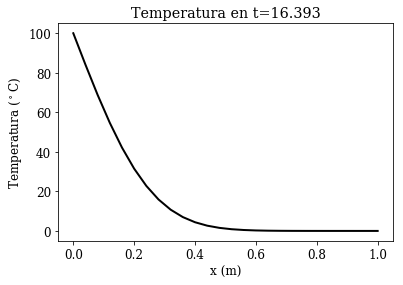

In [2]:
### ALUMNO
def euler_explicito(T, nt, dt, dx, alpha):
    for n in range(1,nt):
        Tn = T.copy()
        for i in range(1,len(T)):
            if i==len(T)-1:
                T[i] = T[i-1]
            else:
                T[i] = Tn[i] + alpha*dt/dx**2 * (Tn[i+1] - 2*Tn[i] + Tn[i-1])
    return T
# escriba función para euler explícito
### 

sigma = 0.5
dt    = sigma*dx**2/alpha

print ('El paso de tiempo es %1.4f'%dt)

T = Ti.copy()
T = euler_explicito(T, nt, dt, dx, alpha)
plt.plot(x, T, color='k', lw=2)
plt.title('Temperatura en t=%1.3f'%(nt*dt))
plt.ylabel(r'Temperatura ($^\circ$C)')
plt.xlabel('x (m)');

Prueben con $\sigma = 0.6$. Ya saben lo que va a pasar ¿cierto?

### Euler implícito

Vamos a resolver el mismo problema usando Euler implícito. En este caso, tenemos que resolver un sistema lineal en cada paso de tiempo ¿Cómo podemos resolver el sistema lineal?

Aquí es donde usar lenguajes como Python se hace muy útil: existen librerías que resuelven sistemas lineales `Ax=b` dada una matriz `A` y un vector `b`. La más conocida es `scipy`, pero no es la única. Por ejemplo `scipy.linalg.solve(A, b)` encuentra el vector `x` para `Ax=b`.    

Generemos una función que haga el paso de tiempo de Euler implícito:

In [3]:
from scipy.linalg import solve
def euler_implicito(T, A, nt, sigma):
    
    for t in range(nt):
        Tn = T.copy()
        b = lado_derecho(Tn, sigma)

        T_interior = solve(A,b)
        T[1:-1] = T_interior
        T[0]  = 100   # Dirichlet BC
        T[-1] = T[-2] # Neumann BC

    return T

Fíjense que el resultado del sistema lineal es `T_interior`. Éste es un arreglo con las temperaturas al interior del dominio, sin considerar los bordes. Por lo tanto, `T_interior` tendrá $N-2$ elementos, mientras que `T` dentrá $N$ elementos.

#### Es el turno de ustedes
Como ven en la función `euler_implicito`, la matriz `A` es un dato de entrada, y debemos generar el lado derecho de la ecuación en cada paso de tiempo. La tarea de este laboratorio es generar una función que genere la matriz `A` y otra función llamada `lado_derecho` que calcule el lado derecho de la ecuación en cada paso de tiempo.

Primero prueben con $\sigma =0.5$, pero luego cambien a $\sigma=2$ ¿Explota la solución?

*Ayuda*: Python nos ofrece un sinnúmero de opciones para generar la matriz, pero una forma fácil es generar una matriz llena de zeros de tamaño $N-2\times N-2$ con

```Python
nx = len(x)
numpy.zeros((nx-2,nx-2))
```

y modificar las posiciones de la matriz que correspondan. 

In [4]:
###ALUMNO
def generarMatriz(nx, sigma):
    A = numpy.zeros((nx-2,nx-2))
    A[0,0] = 2+1/sigma
    A[0,1] = -1
    A[nx-3,nx-3] = 1+1/sigma
    A[nx-3,nx-4] = -1
    for i in range(1,nx-3):
        for j in range(1,nx-3):
            if i==j:                
                A[i,j] = 2+1/sigma
                A[i,j-1] = -1
                A[i,j+1] = -1
    return A
def lado_derecho(T, sigma):
    b = numpy.zeros(nx-2)
    b[0] = T[1]*1/sigma + 100
    b[nx-3] = T[nx-2]*1/sigma + 0 
    for i in range(1,len(b)-1):
        b[i] = T[i+1]*1/sigma 
    return b
#Hacer funciones para generar matriz, 
#calcular lado derecho. Calcule para
#las condiciones dadas.
###

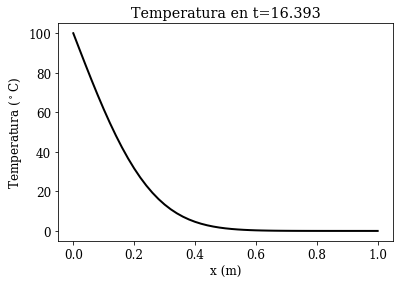

In [5]:
sigma = 0.5
T = Ti.copy()
A = generarMatriz(nx,sigma)
T = euler_implicito(T, A, nt, sigma)
plt.plot(x, T, color='k', lw=2)
plt.title('Temperatura en t=%1.3f'%(nt*dt))
plt.ylabel(r'Temperatura ($^\circ$C)')
plt.xlabel('x (m)');

Si les resultó el programa (¡esperamos!), verán que pueden usar $\sigma$ (y por ende $\Delta t$) muchísimo mayores. Esto es conveniente ya que pueden llegar mucho más lejos en el tiempo, con menos pasos. Por supuesto, existe un límite a esto: al aumentar $\Delta t$ la aproximación se hace cada vez menos exacta, y puede llegar al límite de que no capte cosas que están pasando físicamente a una escala de tiempo menor que $\Delta t$.

## Convergencia espacial
El problema que resolvimos recién es suficientemente simple que tiene una solución analítica. Ésta es:

\begin{equation}
T(x,t) = 100 - \sum_{n=1}^{\infty} \frac{400}{(2n-1)\pi}\sin\left(\frac{(2n-1)\pi}{2L}x\right) \exp\left[-\alpha\left(\frac{(2n-1)\pi}{2L}\right)^2t\right]
\end{equation}

y la siguiente función la calcula en los puntos `x` al tiempo `t`, usando `n_max` términos (en vez de $\infty$):

In [6]:
from math import pi
def T_analytical(x, t, alpha, L, n_max=100):

    T = 100
    for n in range(1,n_max+1):
        k = (2*n-1)*pi/(2*L)
        
        summation = 400/((2*n-1)*pi) * numpy.sin(k*x) * numpy.exp(-alpha*k*k*t)
        T -= summation

    return T

from math import sqrt
def L2_error(f_ap, f_an):
    num = numpy.zeros(len(f_ap))
    den = numpy.zeros(len(f_an))
    for i in range(len(num)):
        num[i] = (f_ap[i] - f_an[i])**2
        den[i] = f_an[i]**2   
    return sqrt(numpy.sum(num)/numpy.sum(den))

Usando $\sigma = 1.22$, calculen el error L2 (laboratorio 2) de aproximación al tiempo $t=40$ con mallas de $N=26, 51, 101, 201$, y grafiquen error versus $\Delta x$ usando *log-log* ¿Cuál es la convergencia espacial del método? ¿Es lo que esperaban? *Nota*: fíjense que necesitan diferente número de pasos de tiempo en cada caso.


Repitan los cálculos al tiempo $t=400$. ¿Pasa algo con la convergencia? ¿Por qué? *Nota*: ¿Cuál es el orden de aproximación de la condición de contorno en el lado derecho?

In [7]:
### ALUMNO
#Estudie la convergencia con las mallas indicadas
###
sigma = 1.22
t = 40
mallas = [26,51,101,201]
error = numpy.zeros(len(mallas))
for i in range(len(mallas)):
    nx = mallas[i]
    dx = L/(nx-1)
    x  = numpy.linspace(0, 1, nx)
    dt    = sigma*dx**2/alpha
    nt = int(t/dt)
    A = generarMatriz(nx, sigma)
    error[i] = L2_error(euler_implicito(T, A, nt, sigma),T_analytical(x, t ,alpha, L, n_max=100))

pyplot.loglog(mallas,error,c='k', ls='-', marker='x')
    


ValueError: could not broadcast input array from shape (24) into shape (49)

#### Para los interesados
La convergencia temporal debiese ser de primer orden, ya que estamos usando Euler. ¿Se acuerdan de Crank-Nicolson en el laboratorio 3? Ese método es de segundo orden. Si hacen la misma derivación que hicimos acá, veran que con modificaciones simples a la matriz y el lado derecho de la ecuación, ¡pueden implementar un esquema de Crank-Nicolson!